In [13]:
import pandas as pd
import numpy as np
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load the data
df = pd.read_csv("C:/GitHub\Machine-Learning/data/BCM_DATA_lagged.csv")


# Prepare the dataframe
df_prophet = df[["ACC_MONTH", "TOT_PAID", "NBR_CASE", "BUDGET_AMT"]].copy()
df_prophet.rename(columns={"ACC_MONTH": "ds", "TOT_PAID": "y"}, inplace=True)
df_prophet["ds"] = pd.to_datetime(df_prophet["ds"])

# Drop any rows with missing values
df_prophet.dropna(subset=["y", "NBR_CASE", "BUDGET_AMT"], inplace=True)

# Split data: last 12 rows for testing
train_df = df_prophet[:-12]
test_df = df_prophet[-12:]

# Initialize the Prophet model and add regressors
model = Prophet(yearly_seasonality=True)
model.add_regressor("NBR_CASE")
model.add_regressor("BUDGET_AMT")

# Fit the model
model.fit(train_df)

# Ensure no NaNs in future regressors
future = test_df[["ds", "NBR_CASE", "BUDGET_AMT"]].copy()
future.dropna(inplace=True)

# Forecast
forecast = model.predict(future)

# Merge predictions with actuals
forecast_result = pd.merge(
    test_df[["ds", "y"]],
    forecast[["ds", "yhat"]],
    on="ds",
    how="inner"
)

# Drop rows with NaNs in merged forecast
forecast_result_clean = forecast_result.dropna()

# Check if any valid predictions exist
if forecast_result_clean.empty:
    print("No valid forecast data available for evaluation. Check input regressors for NaNs or alignment issues.")
else:
    # Calculate evaluation metrics
    mse = mean_squared_error(forecast_result_clean["y"], forecast_result_clean["yhat"])
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(forecast_result_clean["y"], forecast_result_clean["yhat"])
    mape = np.mean(np.abs((forecast_result_clean["y"] - forecast_result_clean["yhat"]) / forecast_result_clean["y"])) * 100

    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"MAPE: {mape:.2f}%")



21:52:47 - cmdstanpy - INFO - Chain [1] start processing
21:52:47 - cmdstanpy - INFO - Chain [1] done processing


MSE: 122607404251.44
RMSE: 350153.40
MAE: 299405.65
MAPE: 16.84%


In [6]:
import pandas as pd
import numpy as np
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load the data
df = pd.read_csv("C:/GitHub\Machine-Learning/data/BCM_DATA_lagged.csv")
df.head()

,Unnamed: 0,ACC_MONTH,FISCAL_YEAR,ACCOUNTING_PERIOD,TOT_PAID,BUDGET_AMT,NBR_CASE,NBR_MURDER,NBR_OTHER,BUDGET_AMT_lag2,BUDGET_AMT_lag8,BUDGET_AMT_lag12,NBR_MURDER_lag1,NBR_MURDER_lag2,NBR_MURDER_lag20,NBR_CASES_lag2,NBR_CASES_lag11
0,20,2012-12-31,2012,9,1705037.78,3051046.44,51,12,39,1831774.12,2064924.92,1790695.50,14.0,9.0,16.0,35.0,27.0
1,21,2013-01-31,2012,10,1654993.05,1619809.81,33,10,23,3229496.07,1387912.58,1337685.21,12.0,14.0,8.0,61.0,32.0
2,22,2013-02-28,2012,11,2364079.84,2386270.90,35,11,24,3051046.44,2203039.23,1815549.91,10.0,12.0,12.0,51.0,75.0
3,23,2013-03-31,2012,12,900197.95,2377410.52,27,10,17,1619809.81,1510063.18,2238235.90,11.0,10.0,9.0,33.0,36.0
4,24,2013-04-30,2013,1,2671204.95,2164948.38,49,13,36,2386270.90,2852607.30,2064924.92,10.0,11.0,17.0,35.0,30.0


In [14]:
import pandas as pd
import numpy as np
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load the data
df = pd.read_csv("C:/GitHub\Machine-Learning/data/BCM_DATA_lagged.csv")
df.head()


# Prepare the dataframe
df_prophet = df[["ACC_MONTH", "TOT_PAID", "NBR_CASES_lag11", "BUDGET_AMT_lag12"]].copy()
df_prophet.rename(columns={"ACC_MONTH": "ds", "TOT_PAID": "y"}, inplace=True)
df_prophet["ds"] = pd.to_datetime(df_prophet["ds"])

# Drop any rows with missing values
df_prophet.dropna(subset=["y", "NBR_CASES_lag11", "BUDGET_AMT_lag12"], inplace=True)

# Split data: last 12 rows for testing
train_df = df_prophet[:-12]
test_df = df_prophet[-12:]

# Initialize the Prophet model and add regressors
model = Prophet(yearly_seasonality=True)
model.add_regressor("NBR_CASES_lag11")
model.add_regressor("BUDGET_AMT_lag12")

# Fit the model
model.fit(train_df)

# Ensure no NaNs in future regressors
future = test_df[["ds", "NBR_CASES_lag11", "BUDGET_AMT_lag12"]].copy()
future.dropna(inplace=True)

# Forecast
forecast = model.predict(future)

# Merge predictions with actuals
forecast_result = pd.merge(
    test_df[["ds", "y"]],
    forecast[["ds", "yhat"]],
    on="ds",
    how="inner"
)

# Drop rows with NaNs in merged forecast
forecast_result_clean = forecast_result.dropna()

# Check if any valid predictions exist
if forecast_result_clean.empty:
    print("No valid forecast data available for evaluation. Check input regressors for NaNs or alignment issues.")
else:
    # Calculate evaluation metrics
    mse = mean_squared_error(forecast_result_clean["y"], forecast_result_clean["yhat"])
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(forecast_result_clean["y"], forecast_result_clean["yhat"])
    mape = np.mean(np.abs((forecast_result_clean["y"] - forecast_result_clean["yhat"]) / forecast_result_clean["y"])) * 100

    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"MAPE: {mape:.2f}%")



21:52:55 - cmdstanpy - INFO - Chain [1] start processing
21:52:55 - cmdstanpy - INFO - Chain [1] done processing


MSE: 122747166013.38
RMSE: 350352.92
MAE: 314395.45
MAPE: 17.71%


In [18]:
import pandas as pd
import numpy as np
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load the data
df = pd.read_csv("C:/GitHub\Machine-Learning/data/BCM_DATA_lagged.csv")
df.head()


# Prepare the dataframe
df_prophet = df[["ACC_MONTH", "TOT_PAID", "NBR_MURDER_lag20", "BUDGET_AMT_lag12"]].copy()
df_prophet.rename(columns={"ACC_MONTH": "ds", "TOT_PAID": "y"}, inplace=True)
df_prophet["ds"] = pd.to_datetime(df_prophet["ds"])

# Drop any rows with missing values
df_prophet.dropna(subset=["y", "NBR_MURDER_lag20", "BUDGET_AMT_lag12"], inplace=True)

# Split data: last 12 rows for testing
train_df = df_prophet[:-12]
test_df = df_prophet[-12:]

# Initialize the Prophet model and add regressors
model = Prophet(yearly_seasonality=True)
model.add_regressor("NBR_MURDER_lag20")
model.add_regressor("BUDGET_AMT_lag12")

# Fit the model
model.fit(train_df)

# Ensure no NaNs in future regressors
future = test_df[["ds", "NBR_MURDER_lag20", "BUDGET_AMT_lag12"]].copy()
future.dropna(inplace=True)

# Forecast
forecast = model.predict(future)

# Merge predictions with actuals
forecast_result = pd.merge(
    test_df[["ds", "y"]],
    forecast[["ds", "yhat"]],
    on="ds",
    how="inner"
)

# Drop rows with NaNs in merged forecast
forecast_result_clean = forecast_result.dropna()

# Check if any valid predictions exist
if forecast_result_clean.empty:
    print("No valid forecast data available for evaluation. Check input regressors for NaNs or alignment issues.")
else:
    # Calculate evaluation metrics
    mse = mean_squared_error(forecast_result_clean["y"], forecast_result_clean["yhat"])
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(forecast_result_clean["y"], forecast_result_clean["yhat"])
    mape = np.mean(np.abs((forecast_result_clean["y"] - forecast_result_clean["yhat"]) / forecast_result_clean["y"])) * 100

    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"MAPE: {mape:.2f}%")



21:55:15 - cmdstanpy - INFO - Chain [1] start processing
21:55:15 - cmdstanpy - INFO - Chain [1] done processing


MSE: 123822914115.39
RMSE: 351884.80
MAE: 311785.20
MAPE: 18.10%


In [22]:
import pandas as pd
import numpy as np
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load the data
df = pd.read_csv("C:/GitHub\Machine-Learning/data/BCM_DATA_lagged.csv")
df.head()


# Prepare the dataframe
df_prophet = df[["ACC_MONTH", "TOT_PAID", "NBR_MURDER_lag20", "BUDGET_AMT_lag2"]].copy()
df_prophet.rename(columns={"ACC_MONTH": "ds", "TOT_PAID": "y"}, inplace=True)
df_prophet["ds"] = pd.to_datetime(df_prophet["ds"])

# Drop any rows with missing values
df_prophet.dropna(subset=["y", "NBR_MURDER_lag20", "BUDGET_AMT_lag2"], inplace=True)

# Split data: last 12 rows for testing
train_df = df_prophet[:-12]
test_df = df_prophet[-12:]

# Initialize the Prophet model and add regressors
model = Prophet(yearly_seasonality=True)
model.add_regressor("NBR_MURDER_lag20")
model.add_regressor("BUDGET_AMT_lag2")

# Fit the model
model.fit(train_df)

# Ensure no NaNs in future regressors
future = test_df[["ds", "NBR_MURDER_lag20", "BUDGET_AMT_lag2"]].copy()
future.dropna(inplace=True)

# Forecast
forecast = model.predict(future)

# Merge predictions with actuals
forecast_result = pd.merge(
    test_df[["ds", "y"]],
    forecast[["ds", "yhat"]],
    on="ds",
    how="inner"
)

# Drop rows with NaNs in merged forecast
forecast_result_clean = forecast_result.dropna()

# Check if any valid predictions exist
if forecast_result_clean.empty:
    print("No valid forecast data available for evaluation. Check input regressors for NaNs or alignment issues.")
else:
    # Calculate evaluation metrics
    mse = mean_squared_error(forecast_result_clean["y"], forecast_result_clean["yhat"])
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(forecast_result_clean["y"], forecast_result_clean["yhat"])
    mape = np.mean(np.abs((forecast_result_clean["y"] - forecast_result_clean["yhat"]) / forecast_result_clean["y"])) * 100

    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"MAPE: {mape:.2f}%")



21:58:08 - cmdstanpy - INFO - Chain [1] start processing
21:58:08 - cmdstanpy - INFO - Chain [1] done processing


MSE: 109589627496.78
RMSE: 331043.24
MAE: 279624.51
MAPE: 16.10%


In [20]:
import pandas as pd
import numpy as np
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load the data
df = pd.read_csv("C:/GitHub\Machine-Learning/data/BCM_DATA_lagged.csv")
df.head()


# Prepare the dataframe
df_prophet = df[["ACC_MONTH", "TOT_PAID", "NBR_MURDER_lag2", "BUDGET_AMT_lag2"]].copy()
df_prophet.rename(columns={"ACC_MONTH": "ds", "TOT_PAID": "y"}, inplace=True)
df_prophet["ds"] = pd.to_datetime(df_prophet["ds"])

# Drop any rows with missing values
df_prophet.dropna(subset=["y", "NBR_MURDER_lag2", "BUDGET_AMT_lag2"], inplace=True)

# Split data: last 12 rows for testing
train_df = df_prophet[:-12]
test_df = df_prophet[-12:]

# Initialize the Prophet model and add regressors
model = Prophet(yearly_seasonality=True)
model.add_regressor("NBR_MURDER_lag2")
model.add_regressor("BUDGET_AMT_lag2")

# Fit the model
model.fit(train_df)

# Ensure no NaNs in future regressors
future = test_df[["ds", "NBR_MURDER_lag2", "BUDGET_AMT_lag2"]].copy()
future.dropna(inplace=True)

# Forecast
forecast = model.predict(future)

# Merge predictions with actuals
forecast_result = pd.merge(
    test_df[["ds", "y"]],
    forecast[["ds", "yhat"]],
    on="ds",
    how="inner"
)

# Drop rows with NaNs in merged forecast
forecast_result_clean = forecast_result.dropna()

# Check if any valid predictions exist
if forecast_result_clean.empty:
    print("No valid forecast data available for evaluation. Check input regressors for NaNs or alignment issues.")
else:
    # Calculate evaluation metrics
    mse = mean_squared_error(forecast_result_clean["y"], forecast_result_clean["yhat"])
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(forecast_result_clean["y"], forecast_result_clean["yhat"])
    mape = np.mean(np.abs((forecast_result_clean["y"] - forecast_result_clean["yhat"]) / forecast_result_clean["y"])) * 100

    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"MAPE: {mape:.2f}%")



21:57:00 - cmdstanpy - INFO - Chain [1] start processing
21:57:00 - cmdstanpy - INFO - Chain [1] done processing


MSE: 128249191995.51
RMSE: 358118.96
MAE: 299533.56
MAPE: 17.08%


In [21]:
import pandas as pd
import numpy as np
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load the data
df = pd.read_csv("C:/GitHub\Machine-Learning/data/BCM_DATA_lagged.csv")
df.head()


# Prepare the dataframe
df_prophet = df[["ACC_MONTH", "TOT_PAID", "NBR_MURDER", "BUDGET_AMT"]].copy()
df_prophet.rename(columns={"ACC_MONTH": "ds", "TOT_PAID": "y"}, inplace=True)
df_prophet["ds"] = pd.to_datetime(df_prophet["ds"])

# Drop any rows with missing values
df_prophet.dropna(subset=["y", "NBR_MURDER", "BUDGET_AMT"], inplace=True)

# Split data: last 12 rows for testing
train_df = df_prophet[:-12]
test_df = df_prophet[-12:]

# Initialize the Prophet model and add regressors
model = Prophet(yearly_seasonality=True)
model.add_regressor("NBR_MURDER")
model.add_regressor("BUDGET_AMT")

# Fit the model
model.fit(train_df)

# Ensure no NaNs in future regressors
future = test_df[["ds", "NBR_MURDER", "BUDGET_AMT"]].copy()
future.dropna(inplace=True)

# Forecast
forecast = model.predict(future)

# Merge predictions with actuals
forecast_result = pd.merge(
    test_df[["ds", "y"]],
    forecast[["ds", "yhat"]],
    on="ds",
    how="inner"
)

# Drop rows with NaNs in merged forecast
forecast_result_clean = forecast_result.dropna()

# Check if any valid predictions exist
if forecast_result_clean.empty:
    print("No valid forecast data available for evaluation. Check input regressors for NaNs or alignment issues.")
else:
    # Calculate evaluation metrics
    mse = mean_squared_error(forecast_result_clean["y"], forecast_result_clean["yhat"])
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(forecast_result_clean["y"], forecast_result_clean["yhat"])
    mape = np.mean(np.abs((forecast_result_clean["y"] - forecast_result_clean["yhat"]) / forecast_result_clean["y"])) * 100

    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"MAPE: {mape:.2f}%")



21:57:45 - cmdstanpy - INFO - Chain [1] start processing
21:57:45 - cmdstanpy - INFO - Chain [1] done processing


MSE: 120626519789.39
RMSE: 347313.29
MAE: 290116.40
MAPE: 16.46%


22:23:18 - cmdstanpy - INFO - Chain [1] start processing
22:23:18 - cmdstanpy - INFO - Chain [1] done processing
22:23:18 - cmdstanpy - INFO - Chain [1] start processing
22:23:18 - cmdstanpy - INFO - Chain [1] done processing
22:23:18 - cmdstanpy - INFO - Chain [1] start processing
22:23:19 - cmdstanpy - INFO - Chain [1] done processing


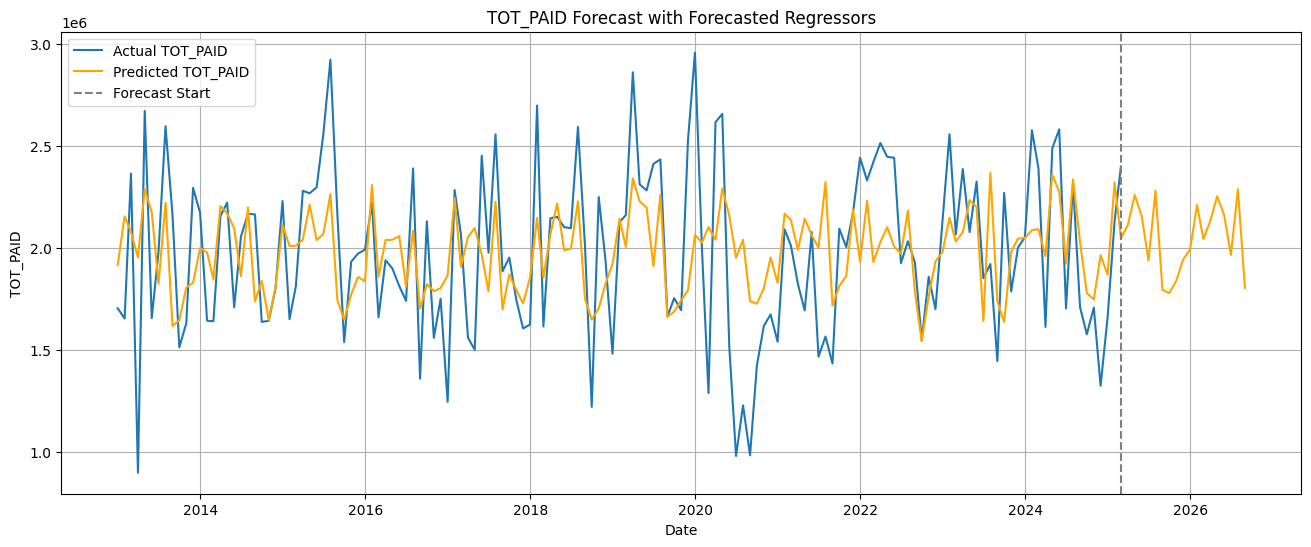

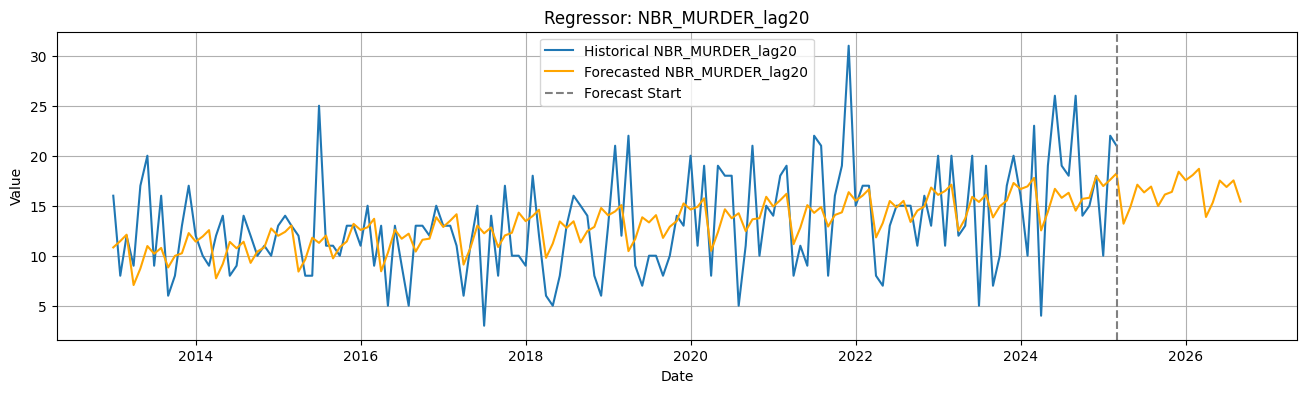

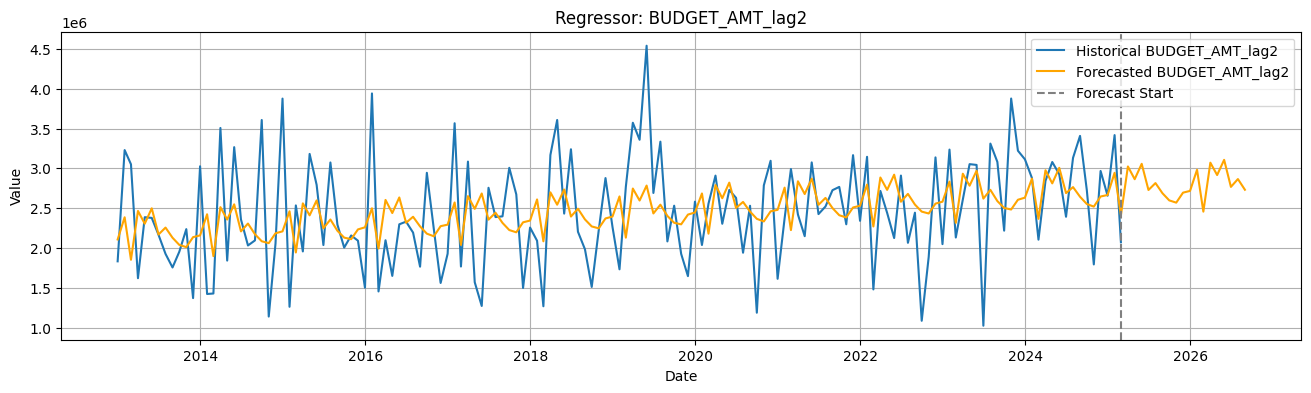

✅ Final 18-Month Forecast of TOT_PAID:
           ds          yhat
0  2025-03-31  2.113651e+06
1  2025-04-30  2.259194e+06
2  2025-05-31  2.157256e+06
3  2025-06-30  1.938206e+06
4  2025-07-31  2.280112e+06
5  2025-08-31  1.794721e+06
6  2025-09-30  1.779429e+06
7  2025-10-31  1.839164e+06
8  2025-11-30  1.942990e+06
9  2025-12-31  1.991876e+06
10 2026-01-31  2.210994e+06
11 2026-02-28  2.044167e+06
12 2026-03-31  2.133120e+06
13 2026-04-30  2.253332e+06
14 2026-05-31  2.161632e+06
15 2026-06-30  1.966041e+06
16 2026-07-31  2.288182e+06
17 2026-08-31  1.804577e+06


In [35]:
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt

# -------- Load & Prepare Data --------
df = pd.read_csv("C:/GitHub\Machine-Learning/data/BCM_DATA_lagged.csv")
df["ACC_MONTH"] = pd.to_datetime(df["ACC_MONTH"])



df_prophet = df[["ACC_MONTH", "TOT_PAID", "NBR_MURDER_lag20", "BUDGET_AMT_lag2"]].copy()
df_prophet.rename(columns={"ACC_MONTH": "ds", "TOT_PAID": "y"}, inplace=True)
df_prophet.dropna(inplace=True)

# -------- Forecast Regressors --------
# NBR_MURDER_lag20
murder_data = df_prophet[["ds", "NBR_MURDER_lag20"]].rename(columns={"NBR_MURDER_lag20": "y"}).dropna()
murder_model = Prophet()
murder_model.fit(murder_data)
future_murder = murder_model.make_future_dataframe(periods=18, freq='ME')
forecast_murder = murder_model.predict(future_murder)[["ds", "yhat"]].rename(columns={"yhat": "NBR_MURDER_lag20"})

# BUDGET_AMT_lag2
budget_data = df_prophet[["ds", "BUDGET_AMT_lag2"]].rename(columns={"BUDGET_AMT_lag2": "y"}).dropna()
budget_model = Prophet()
budget_model.fit(budget_data)
future_budget = budget_model.make_future_dataframe(periods=18, freq='ME')
forecast_budget = budget_model.predict(future_budget)[["ds", "yhat"]].rename(columns={"yhat": "BUDGET_AMT_lag2"})

# -------- Combine Forecasted Regressors --------
future_regressors = pd.merge(forecast_murder, forecast_budget, on="ds")

# -------- Train Prophet Model with Known Data --------
train_df = df_prophet.dropna(subset=["NBR_MURDER_lag20", "BUDGET_AMT_lag2"])
model = Prophet(yearly_seasonality=True)
model.add_regressor("NBR_MURDER_lag20")
model.add_regressor("BUDGET_AMT_lag2")
model.fit(train_df[["ds", "y", "NBR_MURDER_lag20", "BUDGET_AMT_lag2"]])

# -------- Forecast Only Future Dates --------
last_known_date = df_prophet["ds"].max()
future_only = future_regressors[future_regressors["ds"] > last_known_date].copy()
future_only = future_only.dropna(subset=["NBR_MURDER_lag20", "BUDGET_AMT_lag2"])
future_only["NBR_MURDER_lag20"] = pd.to_numeric(future_only["NBR_MURDER_lag20"], errors='coerce')
future_only["BUDGET_AMT_lag2"] = pd.to_numeric(future_only["BUDGET_AMT_lag2"], errors='coerce')
future_only.dropna(inplace=True)

# Forecast TOT_PAID
forecast_target = model.predict(future_only)
final_forecast = forecast_target[["ds", "yhat"]].reset_index(drop=True)

# -------- Combine Predictions with History for Plotting --------
historical_pred = model.predict(train_df[["ds", "NBR_MURDER_lag20", "BUDGET_AMT_lag2"]])
combined_tot_paid = pd.concat([historical_pred[["ds", "yhat"]], forecast_target[["ds", "yhat"]]], axis=0)

# -------- Plot TOT_PAID Forecast --------
plt.figure(figsize=(16, 6))
plt.plot(df_prophet["ds"], df_prophet["y"], label="Actual TOT_PAID")
plt.plot(combined_tot_paid["ds"], combined_tot_paid["yhat"], label="Predicted TOT_PAID", color='orange')
plt.axvline(last_known_date, color="gray", linestyle="--", label="Forecast Start")
plt.title("TOT_PAID Forecast with Forecasted Regressors")
plt.xlabel("Date")
plt.ylabel("TOT_PAID")
plt.legend()
plt.grid(True)
plt.show()

# -------- Plot NBR_MURDER_lag20 --------
plt.figure(figsize=(16, 4))
plt.plot(murder_data["ds"], murder_data["y"], label="Historical NBR_MURDER_lag20")
plt.plot(forecast_murder["ds"], forecast_murder["NBR_MURDER_lag20"], label="Forecasted NBR_MURDER_lag20", color='orange')
plt.axvline(last_known_date, color="gray", linestyle="--", label="Forecast Start")
plt.title("Regressor: NBR_MURDER_lag20")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

# -------- Plot BUDGET_AMT_lag2 --------
plt.figure(figsize=(16, 4))
plt.plot(budget_data["ds"], budget_data["y"], label="Historical BUDGET_AMT_lag2")
plt.plot(forecast_budget["ds"], forecast_budget["BUDGET_AMT_lag2"], label="Forecasted BUDGET_AMT_lag2", color='orange')
plt.axvline(last_known_date, color="gray", linestyle="--", label="Forecast Start")
plt.title("Regressor: BUDGET_AMT_lag2")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

# -------- Print Final Forecast --------
print("✅ Final 18-Month Forecast of TOT_PAID:")
print(final_forecast)
